# HỒI QUY CƠ BẢN

**Mục Lục:**
1. NHẬP THƯ VIỆN
2. NHẬP DATASET
3. TỔNG QUAN DATASET
4. BÀI TẬP 1
    * Câu 1
    * Câu 2
    * Câu 3
5. TRỰC QUAN HOÁ DATASET
6. CHUẨN BỊ DỮ LIỆU
    * Câu 4 (P4)
    * Câu 5 (P4)
    * Câu 6 (P4)
7. HUẤN LUYỆN MÔ HÌNH VÀ KIỂM THỬ
    - Làm sạch dữ liệu
    - Câu 7 (P4)
8. CROSS VALIDATION
    - Câu 8 (P4)
9. BÀI TẬP 2
10. BÀI TẬP 3

## 1. NHẬP THƯ VIỆN

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


## 2. NHẬP DATASET

In [2]:
dataset = pd.read_csv('housing.csv')

## 3. TỔNG QUAN DATASET

In [64]:
#10 rows
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [75]:
dataset.shape

(20640, 10)

In [76]:
len(dataset)

20640

In [7]:
dataset.info()
#total_bedrooms has null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
list(dataset.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [15]:
dataset.describe(include = "all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


## 4. BÀI TẬP 1

**CÂU 1:** Dựa vào kết quả thu được, hãy cho biết khoảng min - max của biến mục tiêu (median_house_value) trong bộ dữ liệu. Có nhận xét gì về miền giá trị của biến mục tiêu? (giá trị min-max, mean, median như thế nào?)

In [16]:
dataset["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

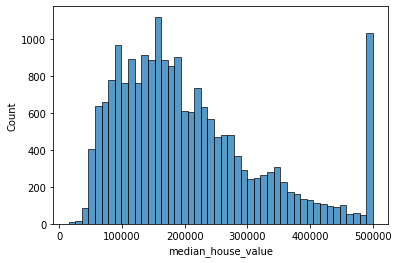

In [18]:
sns.histplot(dataset["median_house_value"])

**CÂU 2:** Hãy cho biết bộ dữ liệu có bao nhiêu dòng, và có tổng cộng bao nhiêu thuộc tính? Liệt kê ra các thuộc tính. Sử dụng: data.columns.

_TỔNG QUAN DATASET_

**CÂU 3:** Cho biết số lượng các giá trị NA trong thuộc tính.
Gợi ý: dùng hàm isnull().sum()

In [19]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 5 .TRỰC QUAN HOÁ DATA

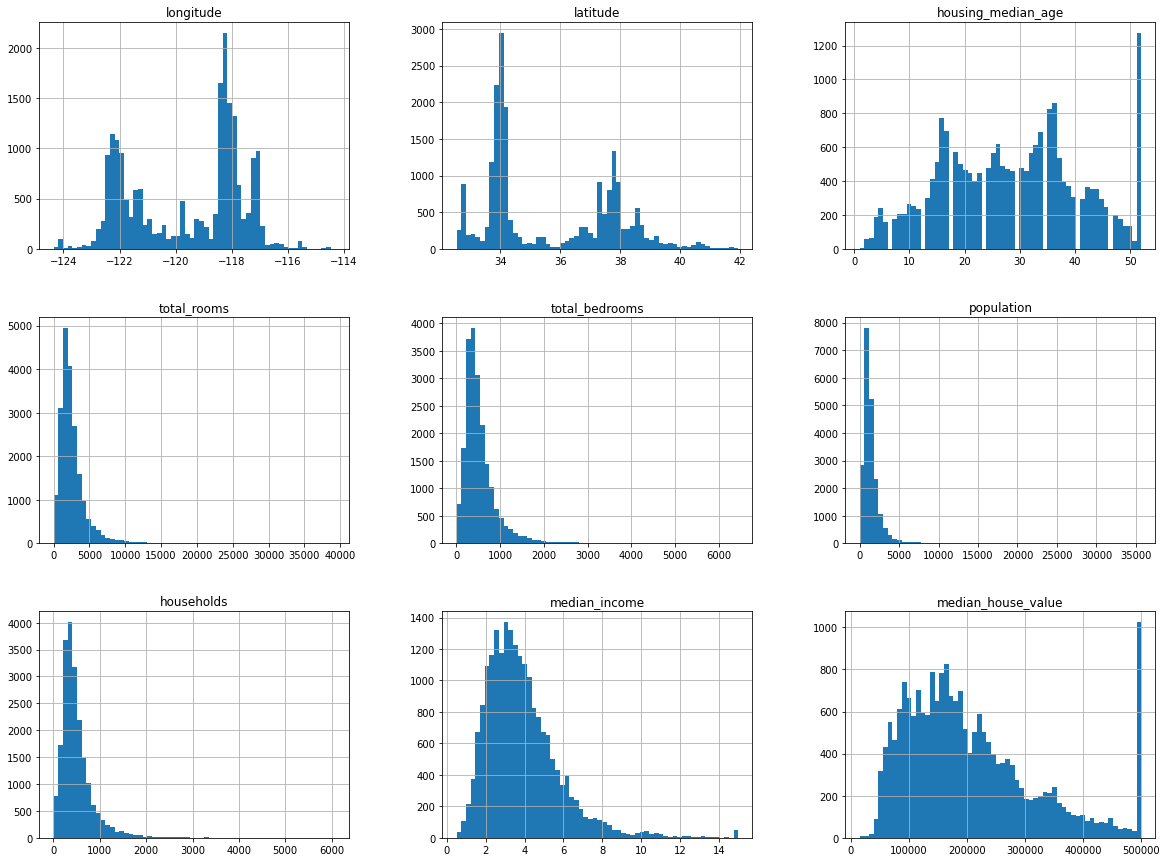

In [41]:
dataset.hist(bins=60, figsize=(20,15))
plt.show()

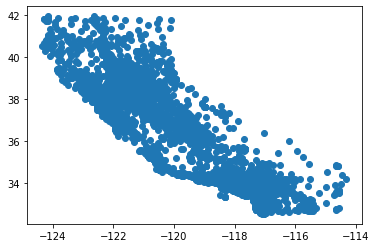

In [26]:
plt.scatter(x=dataset["longitude"], y=dataset["latitude"])
plt.show()

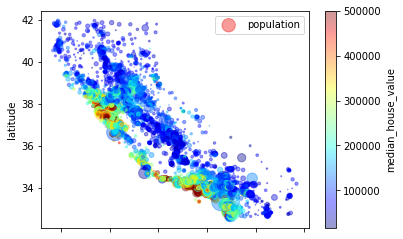

In [34]:
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=dataset["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             )

plt.legend()

/var/folders/cr/lqbhh02d6n37_61d4jrtxnvw0000gn/T/ipykernel_23261/2624074550.py:5: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  california_img=mpimg.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG")


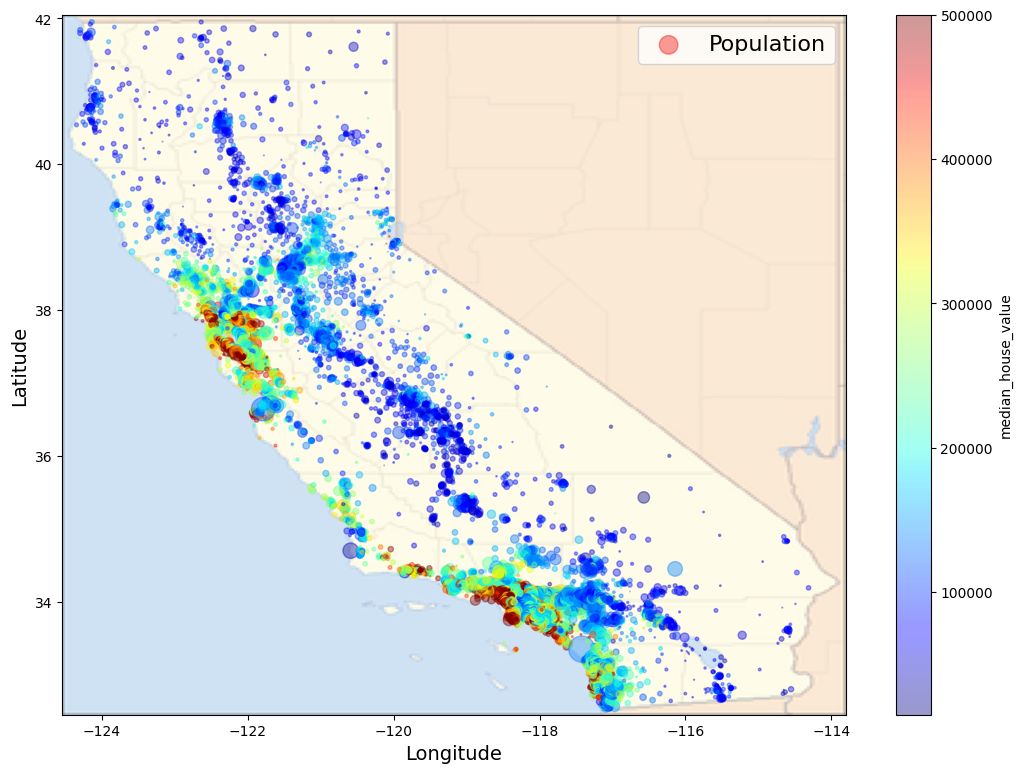

In [51]:
fig = plt.figure(dpi = 100,figsize = (4,4))
ax = fig.add_axes([1,1,1,1])

import matplotlib.image as mpimg
california_img=mpimg.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG")
dataset.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),ax=ax,
                       s=dataset['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# prices = dataset["median_house_value"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar()
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

## 6. CHUẨN BỊ DỮ LIỆU

**CÂU 4:** Vẽ ma trận tương quan giữa các thuộc tính và thể hiện lên màn hình theo code gợi ý. Cho biết mức độ tương quan giữa các thuộc tính với nhau

Text(0.5, 1.0, 'METHOD PEARSON')

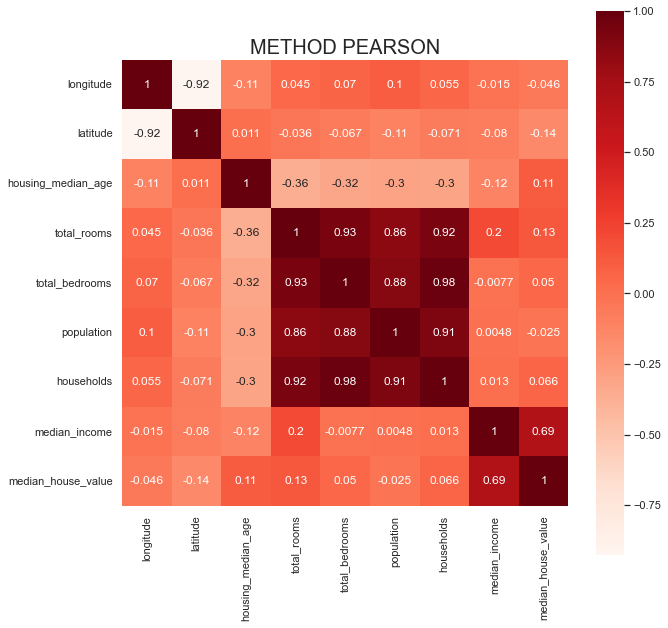

In [310]:
correlation = dataset.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="Reds")
plt.title("METHOD PEARSON", fontsize=20)


Text(0.5, 1.0, 'METHOD KENDALL')

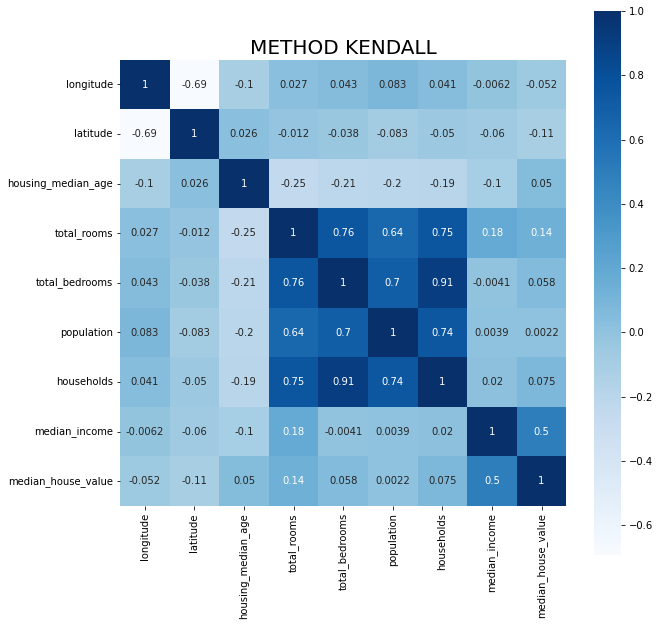

In [104]:
correlation = dataset.corr(method='kendall')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="Blues")
plt.title("METHOD KENDALL", fontsize=20)


Text(0.5, 1.0, 'METHOD SPEARMAN')

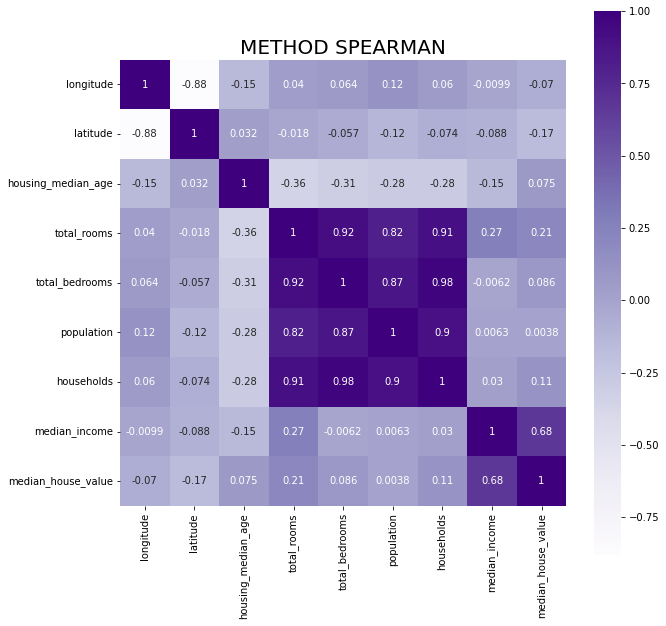

In [103]:
correlation = dataset.corr(method='spearman')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="Purples")
plt.title("METHOD SPEARMAN", fontsize=20)


**CÂU 5:** Vẽ biểu đồ tán xạ (scatter plot) giữa thuộc tính median_income và thuộc tính median_house_value.

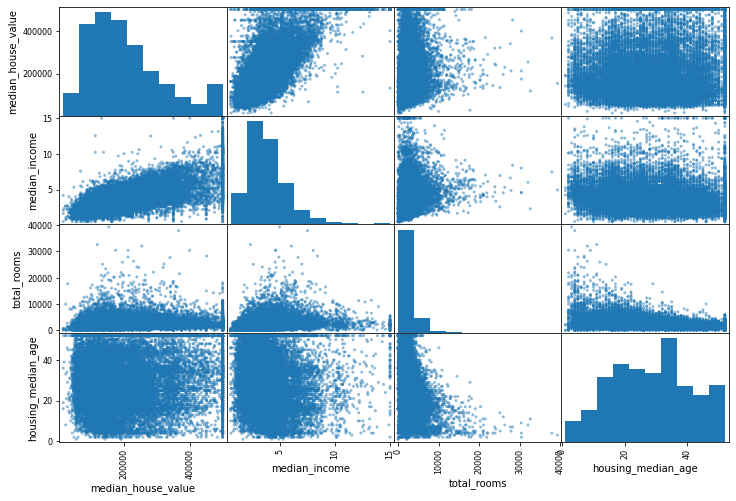

In [58]:
attributes = ['median_house_value', "median_income", "total_rooms",
 "housing_median_age"]

scatter_matrix(dataset[attributes], figsize=(12,8))
plt.show()


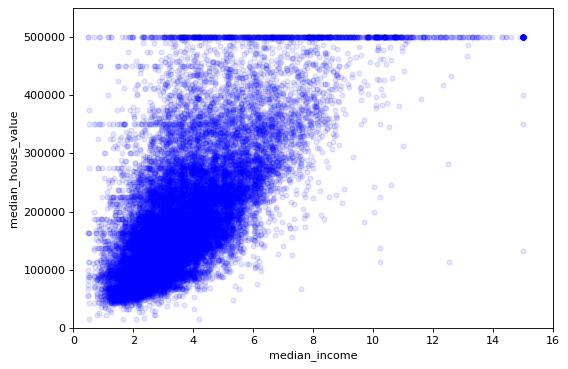

In [78]:
fig = plt.figure(dpi = 80, figsize = (6,4))
ax = fig.add_axes([1,1,1,1])

dataset.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1,color = 'blue',ax=ax)
plt.axis([0, 16, 0, 550000])
plt.show()

**CÂU 6:** Hãy phân chia dữ liệu huấn luyện (X,y) thành tập huấn luyện và tập kiểm thử theo tỉ lệ lần lượt là 8-2. Cho biết chiều (shape) của từng tập dữ liệu.

In [88]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-2].values

In [89]:
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [90]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [92]:
X_train.shape

(16512, 9)

In [93]:
X_test.shape


(4128, 9)

In [94]:
y_train.shape

(16512,)

In [95]:
y_test.shape

(4128,)

## 7. HUẤN LUYỆN MÔ HÌNH VÀ KIỂM THỬ

### - Làm sạch dữ liệu

In [206]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = dataset.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

Điền dữ liệu bị thiếu ở cột _total\_bedrooms_ bằng cách lấy trung vị (median), loại bỏ cột _ocean\_proximity_ kiểu Object để imputer hoạt động

In [311]:
#trung vị từng thuộc tính
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [208]:
housing_num.total_bedrooms.median()

435.0

In [312]:
X = imputer.transform(housing_num)

In [210]:
dataset_trans = pd.DataFrame(X, columns=housing_num.columns)

In [211]:
dataset_trans.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [212]:
dataset_trans.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [213]:
dataset_trans.shape

(20640, 9)

Dữ liệu tập _dataset\_trans_ đã xử lý được missing data tuy nhiên đang không có cột _ocean\_proximity_ 

In [214]:
dataset.shape

(20640, 10)

Xử lý dữ liệu dạng Object có phân loại _ocean\_proximity_

In [215]:
obj_cols = dataset.dtypes
obj_cols[obj_cols=="object"]

ocean_proximity    object
dtype: object

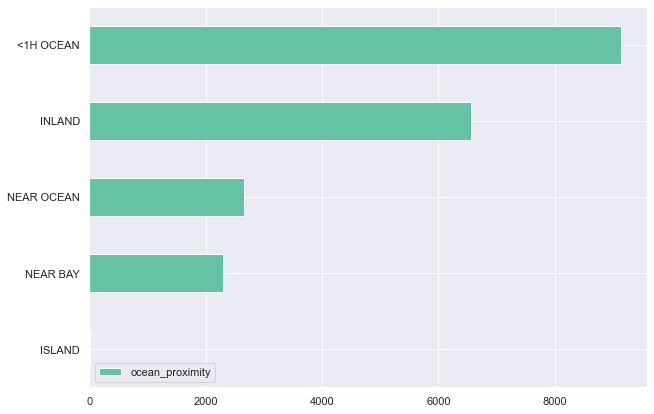

In [216]:
sns.set(palette='Set2')
dataset.ocean_proximity.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.legend()

In [217]:
dataset.loc[dataset.ocean_proximity=="ISLAND"].count()

longitude             5
latitude              5
housing_median_age    5
total_rooms           5
total_bedrooms        5
population            5
households            5
median_income         5
median_house_value    5
ocean_proximity       5
dtype: int64

In [221]:
dataset["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

Dùng hàm _concat_ của _Pandas_ nối dữ liệu đã xử lý missing data của tập _dataset\_trans_ với chỉ duy nhất cột _ocean\_proximity_ của tập dataset ban đầu

In [226]:
data_concat = pd.concat([dataset_trans, dataset.ocean_proximity], axis=1)

In [227]:
data_concat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [228]:
data_concat.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Đến đây, tập _data\_concat_ đã xử lý dữ liệu thiếu và có đầy đủ cột

In [235]:
cols = list(data_concat.columns)
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [240]:
cols = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [241]:
data_concat = data_concat[cols]

In [242]:
data_concat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


Các bước trên nhằm đổi vị trí cột _median\_house\_value_ về cuối dataframe để thuận tiện cho việc chia cắt dữ liệu phục vụ mô hình

### Multiple Linear Regression

Chia tập dữ liệu thành 2 phần

In [243]:
X = data_concat.iloc[:,:-1].values
y = data_concat.iloc[:,-1].values


In [244]:
X

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 'INLAND']], dtype=object)

In [245]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [247]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [248]:
X

array([[0.0, 0.0, 0.0, ..., 322.0, 126.0, 8.3252],
       [0.0, 0.0, 0.0, ..., 2401.0, 1138.0, 8.3014],
       [0.0, 0.0, 0.0, ..., 496.0, 177.0, 7.2574],
       ...,
       [0.0, 1.0, 0.0, ..., 1007.0, 433.0, 1.7],
       [0.0, 1.0, 0.0, ..., 741.0, 349.0, 1.8672],
       [0.0, 1.0, 0.0, ..., 1387.0, 530.0, 2.3886]], dtype=object)

-Dữ liệu dạng Object kiểu phân loại trong dataset đã được mã hoá thành 5 cột _dummy variable_ với tổ hợp (1,0,0,0,0) cho từng loại 

-Ví dụ: (0,0,0,0,1) tương đương NEAR BAY

-Sử dụng kỹ thuật **OneHotEncoder**

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Chia dữ liệu thành tập train và tập test

In [279]:
X_train

array([[0.0, 1.0, 0.0, ..., 228.0, 65.0, 4.2386],
       [0.0, 0.0, 0.0, ..., 1485.0, 447.0, 4.3898],
       [1.0, 0.0, 0.0, ..., 1022.0, 368.0, 3.9333],
       ...,
       [0.0, 0.0, 0.0, ..., 704.0, 393.0, 3.1977],
       [1.0, 0.0, 0.0, ..., 1052.0, 468.0, 5.6315],
       [0.0, 1.0, 0.0, ..., 1024.0, 298.0, 1.3882]], dtype=object)

In [252]:
y_train

array([500001., 270000., 196100., ..., 289300., 484600.,  69400.])

In [254]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.reshape(-1,1)).reshape(- 1)
y_test_transformed = sc.fit_transform(y_test.reshape(-1,1)).reshape(-1)

Vì ở tập kết quả (y), các giá trị min, max, median chênh lệch nhau tương đối lớn vì vậy trên không gian dữ liệu các điểm dữ liệu sẽ bị phân tán rộng, vì vậy cần giảm chúng về cùng tỉ lệ (1,55)

In [260]:
compare_trans_notrans = pd.DataFrame(data=np.array([y_train, y_train_transformed]).T,
                              columns=["y_train", "y_train_transformed"])

compare_trans_notrans

,y_train,y_train_transformed
0,500001.0,55.000000
1,270000.0,29.391747
2,196100.0,21.163740
3,118800.0,12.557177
4,225000.0,24.381458
...,...,...
16507,144600.0,15.429743
16508,159400.0,17.077571
16509,289300.0,31.540604
16510,484600.0,53.285257


Dữ liệu tương ứng sau khi giảm

In [314]:
from sklearn.linear_model import LinearRegression
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train_transformed)

LinearRegression()

Mô hình học, ở đây đang là Multiple LR tức là lấy tất cả các thuộc tính để học

In [315]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = multi_reg.predict(X_test)
mse = mean_squared_error(y_test_transformed, y_pred)
rmse = np.sqrt(mse)
print(rmse)

7.648637137556333


In [316]:
compare_multi_reg = pd.DataFrame(data=np.array([y_test_transformed, y_pred]).T,
                              columns=["y_test_transformed", "y_pred"])

compare_multi_reg

,y_test_transformed,y_pred
0,14.572427,23.452912
1,26.196296,31.349111
2,21.675902,19.318744
3,7.402147,8.967268
4,50.546299,31.818564
...,...,...
4123,18.202102,18.431402
4124,22.110127,26.656665
4125,13.648307,9.264153
4126,28.222679,27.758679


In [317]:
print(f"r2_score = ", r2_score(y_true=y_test_transformed, y_pred=y_pred))

r2_score =  0.6380862497736932


Các kết quả RMSE, r2_score kiểm thử của mô hình

### Simple Linear Regression (1 independent variable "median_icome")

In [318]:
X2 = data_concat["median_income"].values
y2 = data_concat["median_house_value"].values

In [319]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [292]:
X2_train = X2_train.reshape(-1,1)
X2_test = X2_test.reshape(-1,1)

In [301]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range=(1, 55))
y2_train_transformed = sc.fit_transform(y2_train.reshape(-1,1)).reshape(- 1)
y2_test_transformed = sc.fit_transform(y2_test.reshape(-1,1)).reshape(-1)
y2_transformed = sc.fit_transform(y2.reshape(-1,1)).reshape(-1)

Vì ở tập kết quả (y), các giá trị min, max, median chênh lệch nhau tương đối lớn vì vậy trên không gian dữ liệu các điểm dữ liệu sẽ bị phân tán rộng, vì vậy cần giảm chúng về cùng tỉ lệ (1,55)

In [285]:
y2_train_transformed

array([55.        , 29.39174684, 21.16373953, ..., 31.54060396,
       53.28525656,  7.05699358])

In [290]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y2_train_transformed)

LinearRegression()

**Câu 7:**  Dự đoán kết quả cho tập kiểm tra dựa vào mô hình đã huấn luyện, kết quả lưu vào biến y_pred.
Kiểm tra mô hình: dùng độ đo bình phương trung bình sai số (mean square error - MSE).

In [293]:
y2_pred = lin_reg2.predict(X2_test)
mse = mean_squared_error(y2_test_transformed, y2_pred)
rmse = np.sqrt(mse)
print(rmse)

9.457315191070853


In [297]:
compare_lin_reg = pd.DataFrame(data=np.array([y2_test_transformed, y2_pred]).T,
                              columns=["y2_test_transformed", "y2_pred"])

compare_lin_reg

,y2_test_transformed,y2_pred
0,14.572427,23.694473
1,26.196296,31.312336
2,21.675902,24.615936
3,7.402147,15.735449
4,50.546299,27.686855
...,...,...
4123,18.202102,15.878652
4124,22.110127,24.780667
4125,13.648307,19.252826
4126,28.222679,33.015802


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

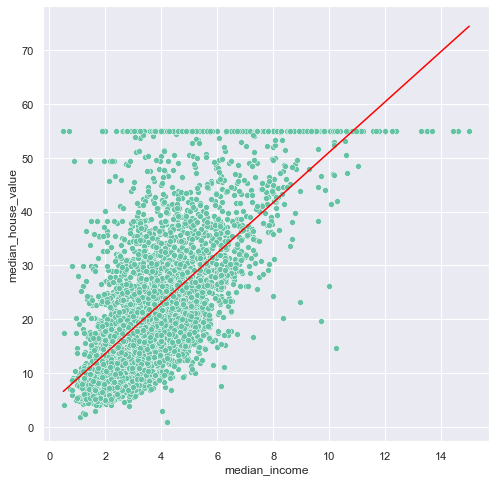

In [298]:
test_true = pd.DataFrame({'median_income': X2_test.reshape(-1), 'median_house_value': y2_test_transformed})
test_pred = pd.DataFrame({'median_income': X2_test.reshape(-1), 'median_house_value': y2_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")

In [294]:
print(f"r2_score = ", r2_score(y_true=y2_test_transformed, y_pred=y2_pred))

r2_score =  0.4466846804895943


Tương tự Multiple, Simple cần xử lí một vài lỗi về chiều data bằng reshape()

Kết quả r2_score của SLR thấp

## 8. CROSS VALIDATION


**Câu 8:** Thực hiện lại mô hình Hồi quy tuyến tính bằng phương pháp cross - valiation. Cho biết kết quả cuối cùng theo độ đo MSE.

In [306]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
avg_r2s = []
for train_index, test_index in kf.split(X2, y2_transformed):
    X2_train = X2[train_index].reshape(-1,1)
    y2_train = y2_transformed[train_index]
    X2_test = X2[test_index].reshape(-1,1) 
    y2_test = y2_transformed[test_index]
    model = LinearRegression() 
    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_test)
    rmse = mean_squared_error(y2_test, y2_pred, squared=True)
    r2s = r2_score(y_true=y2_test, y_pred=y2_pred)
    # Lưu lại kết quả từng fold vào avg_mse, avg_r2s
    avg_mse.append(rmse)
    avg_r2s.append(r2s)



In [307]:
avg_mse

[87.90581581394004,
 85.29054554832334,
 89.37283873635471,
 89.30774651736782,
 87.52453948479425,
 85.60979878870158,
 86.3045034115234,
 88.07837550250288,
 89.67777041636644,
 85.79251914672598]

In [305]:
print(np.mean(np.array(avg_mse)))

87.48644533666005


Kết quả cuối cùng của độ do MSE

In [308]:
avg_r2s

[0.4588591890384667,
 0.4621213534025863,
 0.4715159692015083,
 0.4707933621570576,
 0.4640646393787322,
 0.486077001234001,
 0.46639234923284356,
 0.467630802410991,
 0.4519510596706807,
 0.4822388925952945]

In [309]:
print(np.mean(np.array(avg_r2s)))

0.46816446183221616


## 9. BÀI TẬP 2

Hãy đánh giá độ chính xác của mô hình hồi quy tuyến tính khi dự đoán giá nhà dựa trên thuộc tính total_bedrooms, sử dụng cross_validation với 5 lần thực hiện. So sánh kết quả khi dự đoán bằng thuộc tính median_income với khi dự đoán bằng thuộc tính total_bedroom.

In [322]:
#thuoc tinh median_income
X2

array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886])

In [321]:
y2

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

#### Hồi quy tuyến tính sử dụng cross-validation 5 lần với thuộc tính "median_income"

In [408]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
avg_mse_income = []
avg_r2s_income = []
for train_index, test_index in kf.split(X2, y2_transformed):
    X2_train = X2[train_index].reshape(-1,1)
    y2_train = y2_transformed[train_index]
    X2_test = X2[test_index].reshape(-1,1) 
    y2_test = y2_transformed[test_index]
    model = LinearRegression() 
    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_test)
    rmse = mean_squared_error(y2_test, y2_pred, squared=True)
    r2s = r2_score(y_true=y2_test, y_pred=y2_pred)
    # Lưu lại kết quả từng fold vào avg_mse, avg_r2s
    avg_mse_income.append(rmse)
    avg_r2s_income.append(r2s)

In [329]:
avg_mse_income

[87.90581581394004,
 85.29054554832334,
 89.37283873635471,
 89.30774651736782,
 87.52453948479425]

In [344]:
result_mse_income = np.mean(np.array(avg_mse_income))
print(result_mse_income)

87.88029722015604


In [331]:
avg_r2s_income

[0.4588591890384667,
 0.4621213534025863,
 0.4715159692015083,
 0.4707933621570576,
 0.4640646393787322]

In [345]:
result_r2s_income=np.mean(np.array(avg_r2s_income))
print(np.mean(np.array(avg_r2s_income)))

0.4654709026356702


#### Hồi quy tuyến tính sử dụng cross-validation 5 lần với thuộc tính "total_bedrooms"

Sử dụng bộ _data\_concat_ đã tiền xử lý

In [401]:
X_bedroom = data_concat["total_bedrooms"].values
y_bedroom = data_concat["median_house_value"].values

In [402]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range=(1, 55))
# y_bedroom_train_transformed = sc.fit_transform(y_bedroom_train.reshape(-1,1)).reshape(- 1)
# y_bedroom_test_transformed = sc.fit_transform(y_bedroom_test.reshape(-1,1)).reshape(-1)
y_bedroom_transformed = sc.fit_transform(y_bedroom.reshape(-1,1)).reshape(-1)

In [403]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

kf2 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
avg_mse_bedroom = []
avg_r2s_bedroom = []
for train_index, test_index in kf2.split(X_bedroom, y_bedroom_transformed):
    X_bedroom_train = X_bedroom[train_index].reshape(-1,1)
    y_bedroom_train = y_bedroom_transformed[train_index]
    X_bedroom_test = X_bedroom[test_index].reshape(-1,1) 
    y_bedroom_test = y_bedroom_transformed[test_index]
    model = LinearRegression() 
    model.fit(X_bedroom_train, y_bedroom_train)
    y_bedroom_pred = model.predict(X_bedroom_test)
    rmse = mean_squared_error(y_bedroom_test, y_bedroom_pred, squared=True)
    r2s = r2_score(y_true=y_bedroom_test, y_pred=y_bedroom_pred)
    # Lưu lại kết quả từng fold vào avg_mse, avg_r2s
    avg_mse_bedroom.append(rmse)
    avg_r2s_bedroom.append(r2s)

In [404]:
result_mse_bedrom = np.mean(np.array(avg_mse_bedroom))
print(result_mse_bedrom)

164.19105665337128


In [405]:
result_r2s_bedrom = np.mean(np.array(avg_r2s_bedroom))
print(result_r2s_bedrom)

0.002630390033818042


#### So sánh kết quả sử dụng mô hình 2 thuộc tính khác nhau

In [406]:
data_mse = {'MSE income':[result_mse_income],
        'MSE bedroom':[result_mse_bedrom]}
df_mse= pd.DataFrame(data=data_mse)
df_mse

,MSE income,MSE bedroom
0,87.880297,164.191057


In [407]:
data_r2s = {'r2_score income':[result_r2s_income],
        'r2_score bedroom':[result_r2s_bedrom]}
df_r2s= pd.DataFrame(data=data_r2s)
df_r2s

,r2_score income,r2_score bedroom
0,0.465471,0.00263


## 10. BÀI TẬP 3

Hãy thử kết hợp 2 thuộc tính total_bedrooms và median_income lại với nhau, và so sánh kết quả với Bài 1 và Bài 2. Sử dụng cross validation với 10 lần chia (n_splits=10).

In [413]:
feature = ["total_bedrooms", "median_income"]

In [414]:
X_concat = data_concat[feature].values
y_concat = data_concat["median_house_value"].values

In [415]:
X_concat.shape

(20640, 2)

In [416]:
y_concat.shape

(20640,)

In [417]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range=(1, 55))
# y_bedroom_train_transformed = sc.fit_transform(y_bedroom_train.reshape(-1,1)).reshape(- 1)
# y_bedroom_test_transformed = sc.fit_transform(y_bedroom_test.reshape(-1,1)).reshape(-1)
y_concat_transformed = sc.fit_transform(y_concat.reshape(-1,1)).reshape(-1)

In [418]:
y_concat_transformed.shape

(20640,)

In [419]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

kf3 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
avg_mse_concat = []
avg_r2s_concat = []
for train_index, test_index in kf3.split(X_concat, y_concat_transformed):
    X_concat_train = X_concat[train_index]
    y_concat_train = y_concat_transformed[train_index]
    X_concat_test = X_concat[test_index]
    y_concat_test = y_concat_transformed[test_index]
    model = LinearRegression() 
    model.fit(X_concat_train, y_concat_train)
    y_concat_pred = model.predict(X_concat_test)
    rmse = mean_squared_error(y_concat_test, y_concat_pred, squared=True)
    r2s = r2_score(y_true=y_concat_test, y_pred=y_concat_pred)
    # Lưu lại kết quả từng fold vào avg_mse, avg_r2s
    avg_mse_concat.append(rmse)
    avg_r2s_concat.append(r2s)

In [420]:
result_mse_concat = np.mean(np.array(avg_mse_concat))
print(result_mse_concat)

86.29095422846237


In [421]:
result_r2s_concat = np.mean(np.array(avg_r2s_concat))
print(result_r2s_concat)

0.47514676464355554


In [422]:
data_mse = {'MSE income':[result_mse_income],
        'MSE bedroom':[result_mse_bedrom],
        'MSE income & bedroom': [result_mse_concat]}
df_mse= pd.DataFrame(data=data_mse)
df_mse

,MSE income,MSE bedroom,MSE income & bedroom
0,87.880297,164.191057,86.290954


In [423]:
data_r2s = {'r2_score income':[result_r2s_income],
        'r2_score bedroom':[result_r2s_bedrom],
        'r2_score income & bedroom': [result_r2s_concat]}
df_r2s= pd.DataFrame(data=data_r2s)
df_r2s

,r2_score income,r2_score bedroom,r2_score income & bedroom
0,0.465471,0.00263,0.475147
